In [1]:
import sys
sys.path.append('./../../')

import ikamoana.ikaseapodym as ikadym
import matplotlib.pyplot as plt

from ikamoana.utils import seapodymFieldConstructor
from ikamoana.ikafish.ikafish import IkaFish, IkaFishDebug
from ikamoana.utils import convertToDataArray, convertToMeters

In [2]:
configuration_filepath = "./../../data/ikamoana_config/IkaSim_Example_Fish_025_30.xml"
my_sim = ikadym.IkaSeapodym(filepath=configuration_filepath)

In [3]:
my_sim.loadFields()

 It will also add +1 to sigma_min. Cf. function documentation for more details.


/home/ash/Documents/GitHub_Repositories/OFP-Ikamoana/notebook/IKAMOANA_vs_SEAPODYM/./../../ikamoana/feedinghabitat/feedinghabitat.py:348: RuntimeWarning: overflow encountered in power
  1.0 / (1.0 + (np.power(gamma,(variable - o_star)))),


In [4]:
# my_sim.oceanToNetCDF(to_dataset=True)

In [6]:
diff_y_ika = convertToDataArray(my_sim.ocean.Ky)[:5]
diff_y_sea = seapodymFieldConstructor('../../data/SEAPODYM_data/output/po_freeglorys_0.25x30d_1998_2019/skj_diffusion_5th_cohort_16_91.dym')
diff_y_sea = diff_y_sea.loc[:,50.5:-39.5,119.5:289.5]
diff_y_sea = convertToMeters(diff_y_sea, timestep=30*24*60*60, square=True)

In [7]:
diff_y_ika.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2000-05-16
  * lat      (lat) float32 -40.0 -39.75 -39.5 -39.25 ... 49.25 49.5 49.75 50.0
  * lon      (lon) float32 120.0 120.2 120.5 120.8 ... 289.2 289.5 289.8 290.0

In [8]:
diff_y_sea.coords

Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2000-05-16
  * lat      (lat) float32 50.5 50.25 50.0 49.75 ... -38.75 -39.0 -39.25 -39.5
  * lon      (lon) float32 119.5 119.8 120.0 120.2 ... 288.8 289.0 289.2 289.5

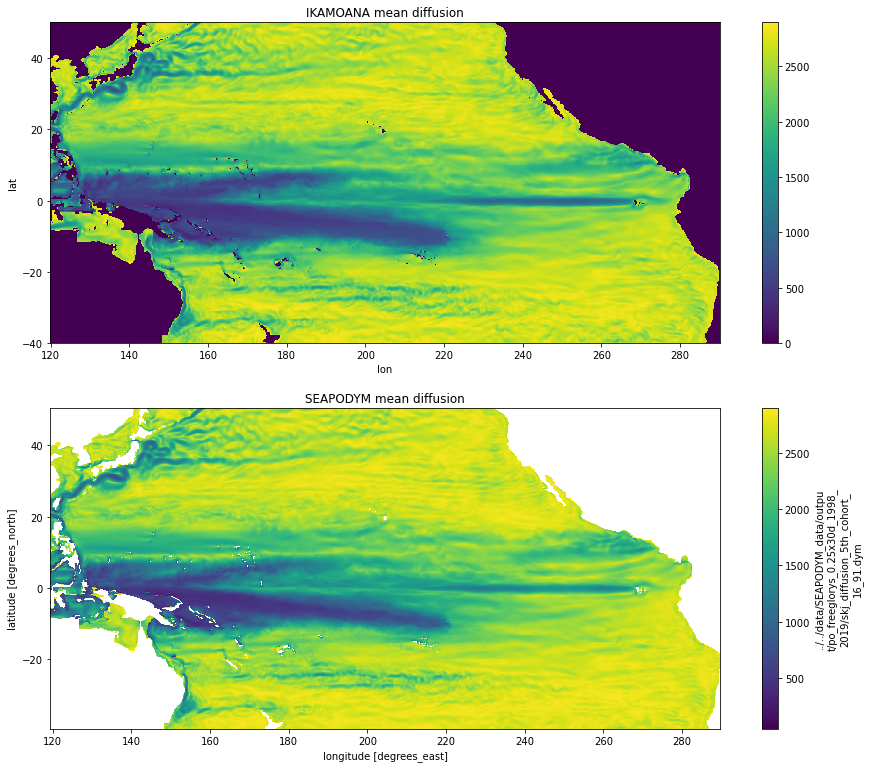

In [9]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(15,13))

abs(diff_y_ika).mean(axis=0).plot(ax=ax1)
abs(diff_y_sea).mean(axis=0).plot(ax=ax2)

ax1.set_title("IKAMOANA mean diffusion")
ax2.set_title("SEAPODYM mean diffusion")

plt.show()

In [10]:
print("IKAMOANA :\n",abs(diff_y_ika).max(axis=(1,2)),end="\n\n")
print("SEAPODYM :\n",abs(diff_y_sea).max(axis=(1,2)))

IKAMOANA :
 <xarray.DataArray (time: 5)>
array([2898.7908, 2899.2095, 2899.1365, 2898.993 , 2900.0125],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2000-05-16

SEAPODYM :
 <xarray.DataArray '../../data/SEAPODYM_data/output/po_freeglorys_0.25x30d_1998_2019/skj_diffusion_5th_cohort_16_91.dym' (time: 5)>
array([2900.311, 2900.311, 2900.311, 2900.311, 2900.311], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-15 2000-02-15 ... 2000-05-16


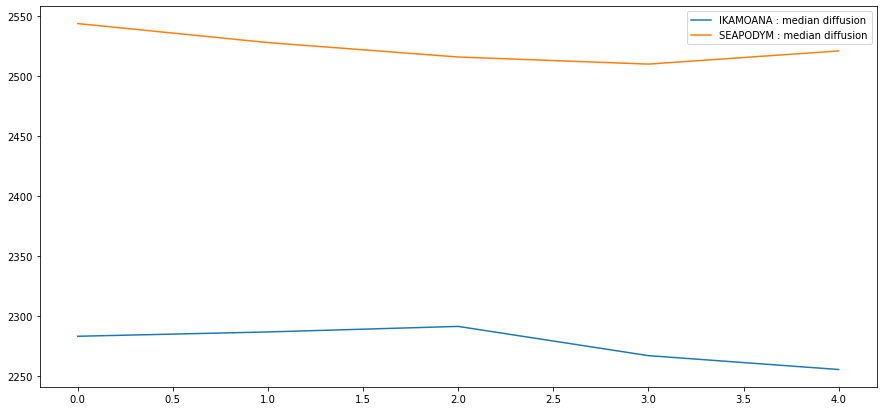

In [13]:
plt.subplots(1,1,figsize=(15,7))

plt.plot(abs(diff_y_ika).median(axis=(1,2)))
plt.plot(abs(diff_y_sea).median(axis=(1,2)))

plt.legend(('IKAMOANA : median diffusion','SEAPODYM : median diffusion'))
plt.show()